In [1]:
import os
import sys
import pandas as pd
import numpy as np
import neptune
from neptune.utils import stringify_unsupported
from utils_neptune import start_neptune_run

In [2]:

import sklearn
print('sklearn version: ', sklearn.__version__)
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, roc_auc_score, accuracy_score, f1_score, precision_score, recall_score

sklearn version:  1.3.2


In [3]:
import umap
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data_dir ='/Users/jonaheaton/ReviveMed Dropbox/Jonah Eaton/development_CohortCombination/alignment_RCC_2024_Feb_27/April_05_Data'

In [5]:
train_name = 'trainval'
eval_name = 'test'

X_train = pd.read_csv(os.path.join(data_dir, f'X_finetune_{train_name}.csv'), index_col=0)
y_train = pd.read_csv(os.path.join(data_dir, f'y_finetune_{train_name}.csv'), index_col=0)
X_eval = pd.read_csv(os.path.join(data_dir, f'X_finetune_{eval_name}.csv'), index_col=0)
y_eval = pd.read_csv(os.path.join(data_dir, f'y_finetune_{eval_name}.csv'), index_col=0)

In [34]:
# Create UMAP object
umap_obj = umap.UMAP()

# Fit UMAP to X_train data
umap_result = umap_obj.fit_transform(X_train)

# Plot UMAP
umap_df = pd.DataFrame(umap_result, columns=['UMAP1', 'UMAP2'],index=X_train.index)
umap_df.to_csv('/Users/jonaheaton/Desktop/Z_embed_orig_trainval.csv')

In [35]:
# Create UMAP object
umap_obj = umap.UMAP()

# Fit UMAP to X_train data
umap_result = umap_obj.fit_transform(X_eval)

# Plot UMAP
umap_df = pd.DataFrame(umap_result, columns=['UMAP1', 'UMAP2'],index=X_eval.index)
umap_df.to_csv('/Users/jonaheaton/Desktop/Z_embed_orig_test.csv')

In [5]:
train_name = 'trainval'
# train_name = 'train'
eval_name = 'test'
y_col = 'IMDC BINARY'
# y_col = 'MSKCC BINARY'

X_train = pd.read_csv(os.path.join(data_dir, f'X_finetune_{train_name}.csv'), index_col=0)
y_train = pd.read_csv(os.path.join(data_dir, f'y_finetune_{train_name}.csv'), index_col=0)
X_eval = pd.read_csv(os.path.join(data_dir, f'X_finetune_{eval_name}.csv'), index_col=0)
y_eval = pd.read_csv(os.path.join(data_dir, f'y_finetune_{eval_name}.csv'), index_col=0)


y_eval = y_eval[y_col]
y_train = y_train[y_col]

# drop the nans
y_eval = y_eval.dropna()
X_eval = X_eval.loc[y_eval.index]
y_train = y_train.dropna()
X_train = X_train.loc[y_train.index]

print('X_train shape: ', X_train.shape)
print('y_train shape: ', y_train.shape)
print('X_eval shape: ', X_eval.shape)
print('y_eval shape: ', y_eval.shape)

X_train shape:  (216, 2736)
y_train shape:  (216,)
X_eval shape:  (57, 2736)
y_eval shape:  (57,)


2024-04-09 17:18:53.668275: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


<Axes: >

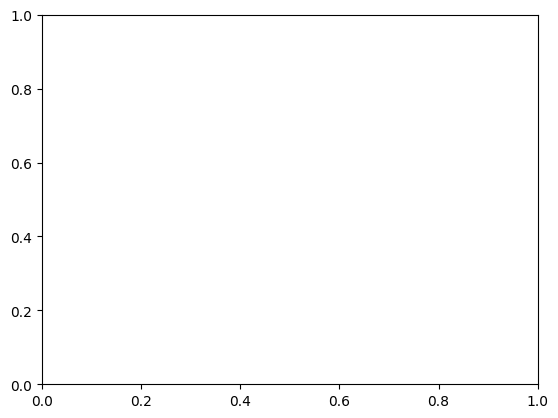

In [29]:
import umap
import matplotlib.pyplot as plt
import seaborn as sns

# Create UMAP object
umap_obj = umap.UMAP()

# Fit UMAP to X_train data
umap_result = umap_obj.fit_transform(X_train)

# Plot UMAP
umap_df = pd.DataFrame(umap_result, columns=['UMAP Dimension 1', 'UMAP Dimension 2'],index=X_train.index)
umap_df[y_col] = y_train

sns.scatterplot(data=umap_df, x='UMAP Dimension 1', y='UMAP Dimension 2', hue=y_col)

<Axes: xlabel='UMAP Dimension 1', ylabel='UMAP Dimension 2'>

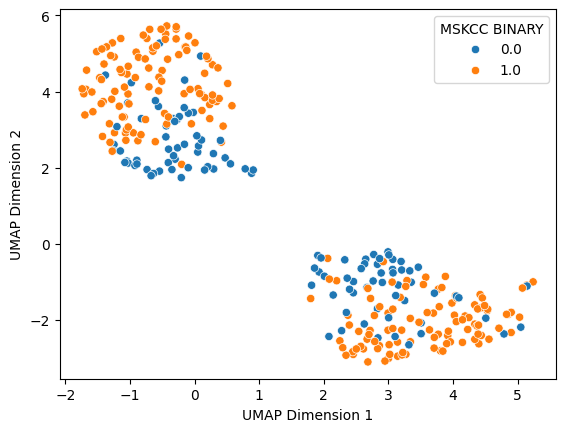

In [32]:
# Create UMAP object
umap_obj = umap.UMAP()

# Fit UMAP to X_train data
umap_result = umap_obj.fit_transform(X_eval)

# Plot UMAP
umap_df = pd.DataFrame(umap_result, columns=['UMAP Dimension 1', 'UMAP Dimension 2'],index=X_eval.index)
umap_df[y_col] = y_eval

sns.scatterplot(data=umap_df, x='UMAP Dimension 1', y='UMAP Dimension 2', hue=y_col)
# place legend outside of plot
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


In [31]:
y_train

0092_Marios_PD1_Inhib2_HP-L1366505-7.mzML    0.0
0077_Marios_PD1_Inhib2_HP-E9479165-7.mzML    1.0
0400_Marios_PD1_Inhib2_HP-EA305478-7.mzML    0.0
0956_Marios_PD1_Inhib2_HP-S3708671-7.mzML    0.0
0685_Marios_PD1_Inhib2_HP-E9123042-7.mzML    0.0
                                            ... 
1116_Marios_PD1_Inhib2_HP-AE586110-7.mzML    1.0
1138_Marios_PD1_Inhib2_HP-AF002696-9.mzML    0.0
0934_Marios_PD1_Inhib2_HP-AF063577-9.mzML    1.0
1025_Marios_PD1_Inhib2_HP-AD452591-7.mzML    1.0
1171_Marios_PD1_Inhib2_HP-AE556393-6.mzML    1.0
Name: MSKCC BINARY, Length: 312, dtype: float64

In [30]:
umap_df

,UMAP Dimension 1,UMAP Dimension 2,MSKCC BINARY
0,2.650024,-0.409404,NaN
1,-0.161742,3.942339,NaN
2,0.049057,2.407766,NaN
3,-1.047502,2.170299,NaN
4,-0.301097,2.221085,NaN
...,...,...,...
307,5.031374,-1.934947,NaN
308,4.091434,-1.424776,NaN
309,4.147769,-2.003343,NaN
310,4.372109,-2.163759,NaN


In [ ]:
# logreg_run_id = 'RCC-1954'
# rf_run_id = 'RCC-1955'
# svc_run_id = 'RCC-1956'

# run_id_list = [logreg_run_id, rf_run_id, svc_run_id]
# sklearn_models = ['LogisticRegression', 'RandomForestClassifier', 'SVC']

In [23]:
import copy

def run_classical_models(train_name='train',eval_name='val',y_col='IMDC BINARY',n_repeats=10,job_num=4):
    # train_name = 'train'
    # eval_name = 'val'
    # y_col = 'IMDC BINARY'
    # y_col = 'MSKCC BINARY'

    X_train = pd.read_csv(os.path.join(data_dir, f'X_finetune_{train_name}.csv'),index_col=0)
    y_train = pd.read_csv(os.path.join(data_dir, f'y_finetune_{train_name}.csv'),index_col=0)
    X_eval = pd.read_csv(os.path.join(data_dir, f'X_finetune_{eval_name}.csv'),index_col=0)
    y_eval = pd.read_csv(os.path.join(data_dir, f'y_finetune_{eval_name}.csv'),index_col=0)

    y_eval = y_eval[y_col]
    y_train = y_train[y_col]

    # drop the nans
    y_eval = y_eval.dropna()
    X_eval = X_eval.loc[y_eval.index]
    y_train = y_train.dropna()
    X_train = X_train.loc[y_train.index]

    print('X_train shape: ', X_train.shape)
    print('y_train shape: ', y_train.shape)
    print('X_eval shape: ', X_eval.shape)
    print('y_eval shape: ', y_eval.shape)

    sklearn_models = ['LogisticRegression', 'RandomForestClassifier', 'SVC', 'DecisionTreeClassifier']

    def record_classical_model(clf_name,setup_id='classical'):

        if clf_name == 'LogisticRegression':
            base_clf = LogisticRegression()
            run_id = 'RCC-3037'
        elif clf_name == 'RandomForestClassifier':
            base_clf = RandomForestClassifier()
            run_id = 'RCC-3038'
        elif clf_name == 'SVC':
            base_clf = SVC(probability=True)
            run_id = 'RCC-3039'
        elif clf_name == 'DecisionTreeClassifier':
            base_clf = DecisionTreeClassifier()
            run_id = 'RCC-3040'

        run, _ = start_neptune_run(with_run_id=run_id,tags=['classical'])
        run[f'{setup_id}/kwargs/model_kind'] = clf_name

        for i in range(n_repeats):
            # run[f'{setup_id}/kwargs/repeat'] = i
            clf = copy.deepcopy(base_clf)

            clf.fit(X_train, y_train)
            y_prob = clf.predict_proba(X_eval)[:,1]

            train_roc_auc = roc_auc_score(y_train, clf.predict_proba(X_train)[:,1], average='micro')
            eval_roc_auc = roc_auc_score(y_eval, y_prob, average='micro')
            # print(f'{clf_name} train_roc_auc: ', train_roc_auc)
            # print(f'{clf_name} eval_roc_auc: ', eval_roc_auc)

            run[f'{setup_id}/eval{job_num}/{train_name}/{y_col}/AUROC (micro)'].append(train_roc_auc)
            run[f'{setup_id}/eval{job_num}/{eval_name}/{y_col}/AUROC (micro)'].append(eval_roc_auc)

        # clf = copy.deepcopy(base_clf)

        # clf.fit(X_train, y_train)
        # y_prob = clf.predict_proba(X_eval)[:,1]

        # train_roc_auc = roc_auc_score(y_train, clf.predict_proba(X_train)[:,1], average='micro')
        # eval_roc_auc = roc_auc_score(y_eval, y_prob, average='micro')
        # print(f'{clf_name} train_roc_auc: ', train_roc_auc)
        # print(f'{clf_name} eval_roc_auc: ', eval_roc_auc)

        # run[f'{setup_id}/eval/{train_name}/{y_col}/AUROC (micro)'].append(train_roc_auc)
        # run[f'{setup_id}/eval/{eval_name}/{y_col}/AUROC (micro)'].append(eval_roc_auc)
        run.wait()
        train_res_array = run[f'{setup_id}/eval{job_num}/{train_name}/{y_col}/AUROC (micro)'].fetch_values()
        eval_res_array = run[f'{setup_id}/eval{job_num}/{eval_name}/{y_col}/AUROC (micro)'].fetch_values()

        train_res_mean = np.mean(train_res_array['value'])
        eval_res_mean = np.mean(eval_res_array['value'])
        print(f'{clf_name} train_roc_auc mean: {train_res_mean:.5f}')
        print(f'{clf_name} eval_roc_auc mean: {eval_res_mean:.5f}')
        run.stop()


    for clf_name in sklearn_models:
        record_classical_model(clf_name)

    return

In [28]:
run_classical_models(train_name='train',eval_name='val',y_col='IMDC BINARY',job_num=4,n_repeats=10)

X_train shape:  (155, 2736)
y_train shape:  (155,)
X_eval shape:  (61, 2736)
y_eval shape:  (61,)
[neptune] [info   ] Neptune initialized. Open in the app: https://app.neptune.ai/revivemed/RCC/e/RCC-3037
Continuing run: RCC-3037
LogisticRegression train_roc_auc mean: 1.00000
LogisticRegression eval_roc_auc mean: 0.90443
[neptune] [info   ] Shutting down background jobs, please wait a moment...
[neptune] [info   ] Done!
[neptune] [info   ] All 0 operations synced, thanks for waiting!
[neptune] [info   ] Explore the metadata in the Neptune app: https://app.neptune.ai/revivemed/RCC/e/RCC-3037/metadata
[neptune] [info   ] Neptune initialized. Open in the app: https://app.neptune.ai/revivemed/RCC/e/RCC-3038
Continuing run: RCC-3038
RandomForestClassifier train_roc_auc mean: 1.00000
RandomForestClassifier eval_roc_auc mean: 0.91970
[neptune] [info   ] Shutting down background jobs, please wait a moment...
[neptune] [info   ] Done!
[neptune] [info   ] All 0 operations synced, thanks for waiti

In [29]:
run_classical_models(train_name='train',eval_name='test',y_col='IMDC BINARY',job_num=4,n_repeats=10)

X_train shape:  (155, 2736)
y_train shape:  (155,)
X_eval shape:  (57, 2736)
y_eval shape:  (57,)
[neptune] [info   ] Neptune initialized. Open in the app: https://app.neptune.ai/revivemed/RCC/e/RCC-3037
Continuing run: RCC-3037
LogisticRegression train_roc_auc mean: 1.00000
LogisticRegression eval_roc_auc mean: 0.90281
[neptune] [info   ] Shutting down background jobs, please wait a moment...
[neptune] [info   ] Done!
[neptune] [info   ] All 0 operations synced, thanks for waiting!
[neptune] [info   ] Explore the metadata in the Neptune app: https://app.neptune.ai/revivemed/RCC/e/RCC-3037/metadata
[neptune] [info   ] Neptune initialized. Open in the app: https://app.neptune.ai/revivemed/RCC/e/RCC-3038
Continuing run: RCC-3038
RandomForestClassifier train_roc_auc mean: 1.00000
RandomForestClassifier eval_roc_auc mean: 0.93785
[neptune] [info   ] Shutting down background jobs, please wait a moment...
[neptune] [info   ] Done!
[neptune] [info   ] All 0 operations synced, thanks for waiti

In [17]:
run_classical_models(train_name='train',eval_name='test',y_col='IMDC BINARY')

X_train shape:  (155, 2736)
y_train shape:  (155,)
X_eval shape:  (57, 2736)
y_eval shape:  (57,)
[neptune] [info   ] Neptune initialized. Open in the app: https://app.neptune.ai/revivemed/RCC/e/RCC-3037
Continuing run: RCC-3037
LogisticRegression train_roc_auc mean: 1.00000
LogisticRegression eval_roc_auc mean: 0.90281
[neptune] [info   ] Shutting down background jobs, please wait a moment...
[neptune] [info   ] Done!
[neptune] [info   ] All 0 operations synced, thanks for waiting!
[neptune] [info   ] Explore the metadata in the Neptune app: https://app.neptune.ai/revivemed/RCC/e/RCC-3037/metadata
[neptune] [info   ] Neptune initialized. Open in the app: https://app.neptune.ai/revivemed/RCC/e/RCC-3038
Continuing run: RCC-3038
RandomForestClassifier train_roc_auc mean: 1.00000
RandomForestClassifier eval_roc_auc mean: 0.95767
[neptune] [info   ] Shutting down background jobs, please wait a moment...
[neptune] [info   ] Done!
[neptune] [info   ] All 0 operations synced, thanks for waiti

In [7]:
run_classical_models(train_name='trainval',eval_name='test',y_col='IMDC BINARY')

X_train shape:  (216, 2736)
y_train shape:  (216,)
X_eval shape:  (57, 2736)
y_eval shape:  (57,)
[neptune] [info   ] Neptune initialized. Open in the app: https://app.neptune.ai/revivemed/RCC/e/RCC-3034
Continuing run: RCC-3034
LogisticRegression train_roc_auc mean:  1.0
LogisticRegression eval_roc_auc mean:  0.907075873827792
[neptune] [info   ] Shutting down background jobs, please wait a moment...
[neptune] [info   ] Done!
[neptune] [info   ] All 0 operations synced, thanks for waiting!
[neptune] [info   ] Explore the metadata in the Neptune app: https://app.neptune.ai/revivemed/RCC/e/RCC-3034/metadata
[neptune] [info   ] Neptune initialized. Open in the app: https://app.neptune.ai/revivemed/RCC/e/RCC-3035
Continuing run: RCC-3035
RandomForestClassifier train_roc_auc mean:  1.0
RandomForestClassifier eval_roc_auc mean:  0.9488491048593349
[neptune] [info   ] Shutting down background jobs, please wait a moment...
[neptune] [info   ] Done!
[neptune] [info   ] All 0 operations synced,

In [10]:
run_classical_models(train_name='trainval',eval_name='test',y_col='MSKCC BINARY')

X_train shape:  (312, 2736)
y_train shape:  (312,)
X_eval shape:  (84, 2736)
y_eval shape:  (84,)
[neptune] [info   ] Neptune initialized. Open in the app: https://app.neptune.ai/revivemed/RCC/e/RCC-3034
Continuing run: RCC-3034
LogisticRegression train_roc_auc mean: 1.00000
LogisticRegression eval_roc_auc mean: 0.90992
[neptune] [info   ] Shutting down background jobs, please wait a moment...
[neptune] [info   ] Done!
[neptune] [info   ] All 0 operations synced, thanks for waiting!
[neptune] [info   ] Explore the metadata in the Neptune app: https://app.neptune.ai/revivemed/RCC/e/RCC-3034/metadata
[neptune] [info   ] Neptune initialized. Open in the app: https://app.neptune.ai/revivemed/RCC/e/RCC-3035
Continuing run: RCC-3035
RandomForestClassifier train_roc_auc mean: 1.00000
RandomForestClassifier eval_roc_auc mean: 0.89799
[neptune] [info   ] Shutting down background jobs, please wait a moment...
[neptune] [info   ] Done!
[neptune] [info   ] All 0 operations synced, thanks for waiti

In [11]:
run_classical_models(train_name='train',eval_name='val',y_col='MSKCC BINARY')

X_train shape:  (230, 2736)
y_train shape:  (230,)
X_eval shape:  (82, 2736)
y_eval shape:  (82,)
[neptune] [info   ] Neptune initialized. Open in the app: https://app.neptune.ai/revivemed/RCC/e/RCC-3034
Continuing run: RCC-3034
LogisticRegression train_roc_auc mean: 1.00000
LogisticRegression eval_roc_auc mean: 0.86310
[neptune] [info   ] Shutting down background jobs, please wait a moment...
[neptune] [info   ] Done!
[neptune] [info   ] All 0 operations synced, thanks for waiting!
[neptune] [info   ] Explore the metadata in the Neptune app: https://app.neptune.ai/revivemed/RCC/e/RCC-3034/metadata
[neptune] [info   ] Neptune initialized. Open in the app: https://app.neptune.ai/revivemed/RCC/e/RCC-3035
Continuing run: RCC-3035
RandomForestClassifier train_roc_auc mean: 1.00000
RandomForestClassifier eval_roc_auc mean: 0.87262
[neptune] [info   ] Shutting down background jobs, please wait a moment...
[neptune] [info   ] Done!
[neptune] [info   ] All 0 operations synced, thanks for waiti

In [9]:
run_classical_models(train_name='train',eval_name='val',y_col='MSKCC BINARY')

X_train shape:  (230, 2736)
y_train shape:  (230,)
X_eval shape:  (82, 2736)
y_eval shape:  (82,)
LogisticRegression train_roc_auc:  1.0
LogisticRegression eval_roc_auc:  0.8630952380952381
[neptune] [info   ] Neptune initialized. Open in the app: https://app.neptune.ai/revivemed/RCC/e/RCC-1954
Continuing run: RCC-1954
[neptune] [info   ] Shutting down background jobs, please wait a moment...
[neptune] [info   ] Done!
[neptune] [info   ] Waiting for the remaining 4 operations to synchronize with Neptune. Do not kill this process.
[neptune] [info   ] All 4 operations synced, thanks for waiting!
[neptune] [info   ] Explore the metadata in the Neptune app: https://app.neptune.ai/revivemed/RCC/e/RCC-1954/metadata
RandomForestClassifier train_roc_auc:  1.0
RandomForestClassifier eval_roc_auc:  0.8630952380952381
[neptune] [info   ] Neptune initialized. Open in the app: https://app.neptune.ai/revivemed/RCC/e/RCC-1955
Continuing run: RCC-1955
[neptune] [info   ] Shutting down background jobs,

In [8]:
run_classical_models(train_name='trainval',eval_name='test',y_col='IMDC BINARY')

X_train shape:  (216, 2736)
y_train shape:  (216,)
X_eval shape:  (57, 2736)
y_eval shape:  (57,)
LogisticRegression train_roc_auc:  1.0
LogisticRegression eval_roc_auc:  0.9156010230179028
[neptune] [info   ] Neptune initialized. Open in the app: https://app.neptune.ai/revivemed/RCC/e/RCC-1954
Continuing run: RCC-1954
[neptune] [info   ] Shutting down background jobs, please wait a moment...
[neptune] [info   ] Done!
[neptune] [info   ] Waiting for the remaining 4 operations to synchronize with Neptune. Do not kill this process.
[neptune] [info   ] All 4 operations synced, thanks for waiting!
[neptune] [info   ] Explore the metadata in the Neptune app: https://app.neptune.ai/revivemed/RCC/e/RCC-1954/metadata
RandomForestClassifier train_roc_auc:  1.0
RandomForestClassifier eval_roc_auc:  0.9226342710997442
[neptune] [info   ] Neptune initialized. Open in the app: https://app.neptune.ai/revivemed/RCC/e/RCC-1955
Continuing run: RCC-1955
[neptune] [info   ] Shutting down background jobs,

## Previous Stuff

In [11]:
y_train.shape

(155,)

In [26]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_prob = lr.predict_proba(X_eval)[:,1]


train_roc_auc = roc_auc_score(y_train, lr.predict_proba(X_train)[:,1], average='micro')
eval_roc_auc = roc_auc_score(y_eval, y_prob, average='micro')
print(f'train_roc_auc: ', train_roc_auc)
print(f'eval_roc_auc: ', eval_roc_auc)

train_roc_auc:  1.0
eval_roc_auc:  0.9087035909920876


In [27]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_prob = lr.predict_proba(X_eval)[:,1]


train_roc_auc = roc_auc_score(y_train, lr.predict_proba(X_train)[:,1], average='macro')
eval_roc_auc = roc_auc_score(y_eval, y_prob, average='micro')
print(f'train_roc_auc: ', train_roc_auc)
print(f'eval_roc_auc: ', eval_roc_auc)

train_roc_auc:  1.0
eval_roc_auc:  0.9087035909920876


In [13]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_prob = lr.predict_proba(X_val)[:,1]


train_roc_auc = roc_auc_score(y_train, lr.predict_proba(X_train)[:,1], average='micro')
val_roc_auc = roc_auc_score(y_val, y_prob, average='micro')

run, _ = start_neptune_run(with_run_id=None,tags=['v3.2','classical'])
run['classical/kwargs/model_kind'] ='LogisticRegression'
run[f'classical/eval/train/{y_col}/AUROC (micro)'] = train_roc_auc
run[f'classical/eval/val/{y_col}/AUROC (micro)'] = val_roc_auc

run.stop()

[neptune] [info   ] Neptune initialized. Open in the app: https://app.neptune.ai/revivemed/RCC/e/RCC-1954
[neptune] [info   ] Shutting down background jobs, please wait a moment...
[neptune] [info   ] Done!
[neptune] [info   ] Waiting for the remaining 3 operations to synchronize with Neptune. Do not kill this process.
[neptune] [info   ] All 3 operations synced, thanks for waiting!
[neptune] [info   ] Explore the metadata in the Neptune app: https://app.neptune.ai/revivemed/RCC/e/RCC-1954/metadata


In [14]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_prob = rf.predict_proba(X_val)[:,1]

train_roc_auc = roc_auc_score(y_train, rf.predict_proba(X_train)[:,1], average='micro')
val_roc_auc = roc_auc_score(y_val, y_prob, average='micro')

run, _ = start_neptune_run(with_run_id=None,tags=['v3.2','classical'])
run['classical/kwargs/model_kind'] ='RandomForestClassifier'
run[f'classical/eval/train/{y_col}/AUROC (micro)'] = train_roc_auc
run[f'classical/eval/val/{y_col}/AUROC (micro)'] = val_roc_auc


run.stop()


[neptune] [info   ] Neptune initialized. Open in the app: https://app.neptune.ai/revivemed/RCC/e/RCC-1955
[neptune] [info   ] Shutting down background jobs, please wait a moment...
[neptune] [info   ] Done!
[neptune] [info   ] Waiting for the remaining 3 operations to synchronize with Neptune. Do not kill this process.
[neptune] [info   ] All 3 operations synced, thanks for waiting!
[neptune] [info   ] Explore the metadata in the Neptune app: https://app.neptune.ai/revivemed/RCC/e/RCC-1955/metadata


In [15]:
svc = SVC(probability=True)
svc.fit(X_train, y_train)
y_prob = svc.predict_proba(X_val)[:,1]

train_roc_auc = roc_auc_score(y_train, svc.predict_proba(X_train)[:,1], average='micro')
val_roc_auc = roc_auc_score(y_val, y_prob, average='micro')

run, _ = start_neptune_run(with_run_id=None,tags=['v3.2','classical'])
run['classical/kwargs/model_kind'] ='SVC'
run[f'classical/eval/train/{y_col}/AUROC (micro)'] = train_roc_auc
run[f'classical/eval/val/{y_col}/AUROC (micro)'] = val_roc_auc


run.stop()

[neptune] [info   ] Neptune initialized. Open in the app: https://app.neptune.ai/revivemed/RCC/e/RCC-1956
[neptune] [info   ] Shutting down background jobs, please wait a moment...
[neptune] [info   ] Done!
[neptune] [info   ] Waiting for the remaining 3 operations to synchronize with Neptune. Do not kill this process.
[neptune] [info   ] All 3 operations synced, thanks for waiting!
[neptune] [info   ] Explore the metadata in the Neptune app: https://app.neptune.ai/revivemed/RCC/e/RCC-1956/metadata


In [17]:
val_roc_auc

0.9195804195804196

## Run Evaluation

In [4]:
NEPTUNE_API_TOKEN = 'eyJhcGlfYWRkcmVzcyI6Imh0dHBzOi8vYXBwLm5lcHR1bmUuYWkiLCJhcGlfdXJsIjoiaHR0cHM6Ly9hcHAubmVwdHVuZS5haSIsImFwaV9rZXkiOiIxMGM5ZDhiMy1kOTlhLTRlMTAtOGFlYy1hOTQzMDE1YjZlNjcifQ=='


In [5]:
encoder_kind = 'AE'
project = neptune.init_project(
    project='revivemed/RCC',
    mode="read-only",
    api_token=NEPTUNE_API_TOKEN
)

runs_table_df = project.fetch_runs_table(tag=['v3.1'],state='inactive').to_pandas()

#drop the failed runs
runs_table_df = runs_table_df[~runs_table_df['sys/failed']].copy()

#filter by encoder_kind
runs_table_df = runs_table_df[runs_table_df['pretrain/kwargs/encoder_kind'] == encoder_kind].copy()

[neptune] [info   ] Neptune initialized. Open in the app: https://app.neptune.ai/revivemed/RCC/


Fetching table...: 0 [00:00, ?/s]

[neptune] [warning] NeptuneWarning: Date parsing failed. The date format is incorrect. Returning as string instead of datetime.


In [11]:
randinit_cols = [x for x in runs_table_df.columns if 'randinit_mkscc_' in x]
randinit_cols = [x for x in randinit_cols if 'AUROC' in x]
df = runs_table_df[randinit_cols].copy()

# drop nans
df.dropna(subset=['randinit_mkscc_1/train/train/epoch/Binary_MSKCC/AUROC (micro)'],inplace=True)

In [12]:
df

,randinit_mkscc_0/eval/test/Binary_MSKCC/AUROC (micro),randinit_mkscc_0/eval/train/Binary_MSKCC/AUROC (micro),randinit_mkscc_0/eval/val/Binary_MSKCC/AUROC (micro),randinit_mkscc_0/train/train/epoch/Binary_MSKCC/AUROC (micro),randinit_mkscc_1/eval/test/Binary_MSKCC/AUROC (micro),randinit_mkscc_1/eval/train/Binary_MSKCC/AUROC (micro),randinit_mkscc_1/eval/val/Binary_MSKCC/AUROC (micro),randinit_mkscc_1/train/train/epoch/Binary_MSKCC/AUROC (micro),randinit_mkscc_2/eval/test/Binary_MSKCC/AUROC (micro),randinit_mkscc_2/eval/train/Binary_MSKCC/AUROC (micro),randinit_mkscc_2/eval/val/Binary_MSKCC/AUROC (micro),randinit_mkscc_2/train/train/epoch/Binary_MSKCC/AUROC (micro)
99,NaN,0.487917,0.491402,0.437500,NaN,0.458000,0.500000,0.439542,NaN,0.522625,0.510582,0.457958
173,NaN,0.992917,0.882275,0.978250,NaN,0.995333,0.871032,0.983000,NaN,0.988250,0.880952,0.978417
180,NaN,0.957083,0.876984,0.956417,NaN,0.866792,0.833664,0.534875,NaN,0.500417,0.447090,0.533000
232,NaN,0.958667,0.875000,0.897917,NaN,0.964333,0.865741,0.922750,NaN,0.500000,0.500000,0.491125
260,NaN,0.893583,0.800265,0.625750,NaN,0.991333,0.870370,0.894750,NaN,0.857167,0.792989,0.528417
290,NaN,0.999417,0.872354,0.998500,NaN,0.997083,0.863757,0.995083,NaN,0.998833,0.869709,0.994250
293,0.917833,0.998583,0.865741,0.996333,0.919659,1.000000,0.874339,0.997083,0.921485,0.999833,0.869709,0.996333
449,NaN,1.000000,0.872354,0.996250,NaN,0.999333,0.863095,0.995500,NaN,0.999917,0.879630,0.998417
553,NaN,0.997583,0.860450,0.972500,NaN,0.836958,0.796958,0.557167,NaN,0.991917,0.875000,0.964583
590,NaN,0.991167,0.873677,0.982750,NaN,0.999583,0.865741,0.996917,NaN,0.999917,0.870370,0.999417


In [2]:
randinit_cols = [x for x in runs_table_df.columns if 'randinit_mkscc_' in x]
randinit_cols = [x for x in randinit_cols if 'AUROC' in x]
df = runs_table_df[randinit_cols].copy()

# drop nans
df.dropna(subset=['randinit_mkscc_1/train/train/epoch/Binary_MSKCC/AUROC (micro)'],inplace=True)

NameError: name 'project' is not defined

In [32]:
runs_table_df.columns

Index(['sys/creation_time', 'sys/description', 'sys/failed', 'sys/hostname',
       'sys/id', 'sys/modification_time', 'sys/monitoring_time', 'sys/name',
       'sys/owner', 'sys/ping_time',
       ...
       'monitoring/fe0263b7/memory', 'monitoring/fe0263b7/pid',
       'monitoring/fe0263b7/stdout', 'monitoring/fe0263b7/tid',
       'monitoring/ffe67bd5/cpu', 'monitoring/ffe67bd5/hostname',
       'monitoring/ffe67bd5/memory', 'monitoring/ffe67bd5/pid',
       'monitoring/ffe67bd5/stdout', 'monitoring/ffe67bd5/tid'],
      dtype='object', length=774)

In [74]:
cols = ['sys/id']
obj_cols = [col for col in runs_table_df.columns if 'objectives/OBJ' in col]
obj_cols = [col for col in obj_cols if '1' in col]
cols.extend(obj_cols)
df = runs_table_df[cols].copy()
df.set_index('sys/id', inplace=True)
df.columns = [col.split('/')[-1] for col in df.columns]

In [75]:
df.dropna(inplace=True)

In [76]:
df.shape

(471, 10)

In [77]:
df.min()

OBJ 0-1-1-1 (v0)     4.206695e-01
OBJ 1-0-0-0 (v0)    -7.011528e+12
OBJ 1-0-0-1 (v0)    -7.011528e+12
OBJ 1-0-0-10 (v0)   -7.011528e+12
OBJ 1-1-0-1 (v0)    -7.011528e+12
OBJ 1-1-1-0 (v0)    -7.011528e+12
OBJ 1-1-1-1 (v0)    -7.011528e+12
OBJ 1-1-1-10 (v0)   -7.011528e+12
OBJ 10-0-0-1 (v0)   -7.011528e+12
OBJ 10-1-1-1 (v0)   -7.011528e+13
dtype: float64

In [78]:
df.max()

OBJ 0-1-1-1 (v0)     0.999698
OBJ 1-0-0-0 (v0)    -0.474020
OBJ 1-0-0-1 (v0)     0.025109
OBJ 1-0-0-10 (v0)    0.025109
OBJ 1-1-0-1 (v0)     0.025109
OBJ 1-1-1-0 (v0)     1.025109
OBJ 1-1-1-1 (v0)     0.525109
OBJ 1-1-1-10 (v0)   -3.974891
OBJ 10-0-0-1 (v0)    0.025109
OBJ 10-1-1-1 (v0)   -3.741073
dtype: float64

In [79]:
outlier_val = 10
df[df<-1*outlier_val] = -1*outlier_val
df[df>outlier_val] = outlier_val

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

In [47]:
df

,objectives/OBJ 0-1-1-1 (v0),objectives/OBJ 1-0-0-0 (v0),objectives/OBJ 1-0-0-1 (v0),objectives/OBJ 1-0-0-10 (v0),objectives/OBJ 1-1-0-1 (v0),objectives/OBJ 1-1-1-0 (v0),objectives/OBJ 1-1-1-1 (v0),objectives/OBJ 1-1-1-10 (v0),objectives/OBJ 10-0-0-1 (v0),objectives/OBJ 10-1-1-1 (v0)
sys/id,,,,,,,,,,
RCC-1424,0.998310,-0.704315,-0.206005,-0.206005,-0.206005,0.793995,0.293995,-4.206005,-0.206005,-6.044841
RCC-1423,0.616359,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
RCC-1422,0.991053,-0.589987,-0.098934,-0.098934,-0.098934,0.901066,0.401066,-4.098934,-0.098934,-4.908821
RCC-1421,0.995662,-0.691467,-0.195805,-0.195805,-0.195805,0.804195,0.304195,-4.195805,-0.195805,-5.919007
RCC-1420,0.993543,-0.593849,-0.100307,-0.100307,-0.100307,0.899693,0.399693,-4.100307,-0.100307,-4.944951
...,...,...,...,...,...,...,...,...,...,...
RCC-924,0.817439,-0.574557,-0.257119,-0.257119,-0.257119,0.742881,0.242881,-4.257119,-0.257119,-4.928134
RCC-1131,0.998294,-0.609690,-0.111395,-0.111395,-0.111395,0.888605,0.388605,-4.111395,-0.111395,-5.098602
RCC-1130,0.998829,-0.617369,-0.118540,-0.118540,-0.118540,0.881460,0.381460,-4.118540,-0.118540,-5.174859


<Axes: >

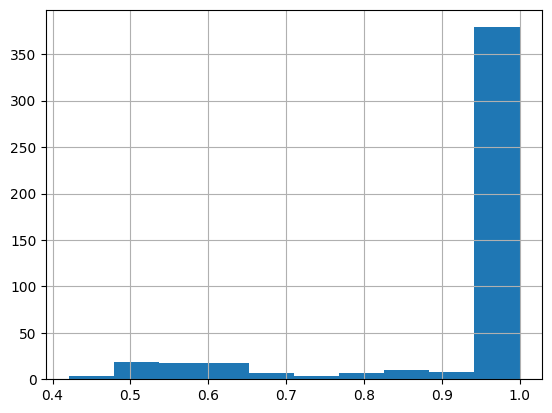

In [36]:


runs_table_df['objectives/OBJ 0-1-1-1 (v0)'].hist()

In [53]:
sns.set_context('talk')

In [80]:
chosen_id = 'RCC-1296'
output_dir = '/Users/jonaheaton/Desktop/viz_april1'
obj_cols = df.columns
for obj_col in obj_cols:
    sns.displot(df[obj_col], bins=25)
    plt.axvline(df.loc[chosen_id][obj_col], color='red', label=chosen_id)
    plt.legend()
    plt.title(obj_col)
    plt.savefig(os.path.join(output_dir, f'{obj_col}.png'))
    plt.close()


In [13]:
run = neptune.init_run(project='revivemed/RCC',
                        api_token=NEPTUNE_API_TOKEN,
                        with_id='RCC-1593',
                        capture_stdout=False,
                        capture_stderr=False,
                        capture_hardware_metrics=False)

[neptune] [info   ] Neptune initialized. Open in the app: https://app.neptune.ai/revivemed/RCC/e/RCC-1593


In [14]:
eval_res = run['finetune_mkscc/eval'].fetch()

In [17]:
eval_res

{'train': {'Binary_MSKCC': {'AUROC (micro)': 0.79425},
  'adversary_loss': 0.0,
  'head_loss': 0.5527179837226868,
  'reconstruction_loss': 1.057364821434021},
 'val': {'Binary_MSKCC': {'AUROC (micro)': 0.6997354497354498},
  'adversary_loss': 0.0,
  'head_loss': 0.6047378182411194,
  'reconstruction_loss': 1.0897470712661743}}

In [24]:
def neptunize_keys(eval_res,prefix='/'):
    new_dict = {}
    for key, val in eval_res.items():
        if isinstance(val,dict):
            if prefix is None:
                prefix = key
            else:
                prefix = prefix + '/' + key
            new_dict.update(neptunize_keys(val,prefix))
        else:
            new_dict[prefix + '/' + key] = val
    return new_dict

In [27]:
def unravel_dict(d, prefix='a',sep='/'):
    unravel = {}
    for k, v in d.items():
        unravel[prefix + sep + k] = v
    for k, v in list(unravel.items()):  # Create a copy of the items
        if isinstance(v, dict):
            unravel.update(unravel_dict(v, k))
            del unravel[k] 
    return unravel

In [28]:
unravel_dict(eval_res,prefix='eval')

{'eval/train/adversary_loss': 0.0,
 'eval/train/head_loss': 0.5527179837226868,
 'eval/train/reconstruction_loss': 1.057364821434021,
 'eval/train/Binary_MSKCC/AUROC (micro)': 0.79425,
 'eval/val/adversary_loss': 0.0,
 'eval/val/head_loss': 0.6047378182411194,
 'eval/val/reconstruction_loss': 1.0897470712661743,
 'eval/val/Binary_MSKCC/AUROC (micro)': 0.6997354497354498}

In [ ]:

def append_eval_history(eval_res):

    

In [26]:
eval_res

{'train': {'Binary_MSKCC': {'AUROC (micro)': 0.79425},
  'adversary_loss': 0.0,
  'head_loss': 0.5527179837226868,
  'reconstruction_loss': 1.057364821434021},
 'val': {'Binary_MSKCC': {'AUROC (micro)': 0.6997354497354498},
  'adversary_loss': 0.0,
  'head_loss': 0.6047378182411194,
  'reconstruction_loss': 1.0897470712661743}}

In [25]:
neptunize_keys(eval_res)

{'//train/Binary_MSKCC/AUROC (micro)': 0.79425,
 '//train/Binary_MSKCC/adversary_loss': 0.0,
 '//train/Binary_MSKCC/head_loss': 0.5527179837226868,
 '//train/Binary_MSKCC/reconstruction_loss': 1.057364821434021,
 '//train/val/Binary_MSKCC/AUROC (micro)': 0.6997354497354498,
 '//train/val/Binary_MSKCC/adversary_loss': 0.0,
 '//train/val/Binary_MSKCC/head_loss': 0.6047378182411194,
 '//train/val/Binary_MSKCC/reconstruction_loss': 1.0897470712661743}

In [16]:
for key, val in eval_res.items():
    print(key)
    print(val)

train
{'Binary_MSKCC': {'AUROC (micro)': 0.79425}, 'adversary_loss': 0.0, 'head_loss': 0.5527179837226868, 'reconstruction_loss': 1.057364821434021}
val
{'Binary_MSKCC': {'AUROC (micro)': 0.6997354497354498}, 'adversary_loss': 0.0, 'head_loss': 0.6047378182411194, 'reconstruction_loss': 1.0897470712661743}


In [22]:
bool('')

False

In [23]:
run.stop()

[neptune] [info   ] Shutting down background jobs, please wait a moment...
[neptune] [info   ] Done!
[neptune] [info   ] All 0 operations synced, thanks for waiting!
[neptune] [info   ] Explore the metadata in the Neptune app: https://app.neptune.ai/revivemed/RCC/e/RCC-1593/metadata


In [13]:
val = 3.5
f'okay{val:.0f}'

'okay4'